## Final - Connor Johnson

In [40]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import sympy as sp
import fractions as fra
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product, chain, accumulate, repeat

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

In [41]:
# Phase portrait: streamplot
def PP_2d(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,dens=[1,1],lw=1,col='k'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)
    ax.streamplot(X,Y,U,V,density=dens,
                 linewidth=lw,color=col,arrowstyle='->')
    return ax

# Phase portrait: nullclines
def PP_nc(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,lw=1,c1='m',c2='b'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)    
    ax.contour(X,Y,U,[0],colors='m')
    ax.contour(X,Y,V,[0],colors='b')
    return ax   

# Display fixed points
def PP_FPs(FPs,tau,delta,ax, print_stable = False):
    ax = ax or plt.gca()
    for j in np.arange(len(FPs)):
        FP_ = np.array(FPs[j],dtype=float) 
        if tau[j]<0 and delta[j]>0:
            if print_stable:
                print('stable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='r',mec='r',lw=2)
        else:
            if print_stable:
                print('unstable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='w',mec='r',lw=2)
    return ax

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()   

def txy_traj(f1,f2,T,dt,xy0):
    t = np.arange(0,T+dt,dt)
    def RHS(xy,t):
        x,y=xy
        return[f1(x,y),f2(x,y)]
    sol = odeint(RHS,xy0,t)
    return [t,sol]

### Problem 1

#### Part (a)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow x(4-y-x^2)=0 \rightarrow x=0$ or $y=4-x^2$<br>
$\dot{y} =0 \rightarrow y(x-1)=0 \rightarrow y=0$ or $x=1$ <br>
<br><br>
Fixed points at $(0,0)$, $(1, 3)$, $(2,0)$, and $(-2,0)$.

In [42]:
# define f1, f2 and A
x,y = sp.symbols(r'x,y')

f1 = lambda x,y: x*(4-y-x**2)
f2 = lambda x,y: y*(x-1)

A = lambda x,y: sp.Matrix([f1(x,y),f2(x,y)]).jacobian([x,y]).applyfunc(sp.factor)
display(Latex(r'Jacobian of the Linearized System: ${}$'.format(sp.latex(A(x,y)))))
tau = A(x,y).trace()
delta = A(x,y).det()
display(Latex(r'$\tau={}$'.format(sp.latex(sp.simplify(tau)))))
display(Latex('$\Delta={}$'.format(sp.latex(sp.simplify(delta)))))
display(Latex(r'$\tau^2-4\Delta={}$'.format(
    sp.latex(sp.simplify(sp.Add(sp.Mul(tau,tau), sp.Mul(sp.Integer(-4), delta)))))))

# calculate fixed points (FPs) and their attributes

FPs = sp.solve((f1(x,y),f2(x,y)),x,y)

FPs_ = [[FP_i.subs({x:x,y:y}) for FP_i in FP] for FP in FPs]
A_FPs_ = [A(x,y).subs({x:FP[0],y:FP[1]}) for FP in FPs_]
tau_   = [A_FP.trace() for A_FP in A_FPs_]
delta_ = [A_FP.det() for A_FP in A_FPs_]

print('Fixed Points with Trace, Determinant, and Discriminant Calculations:')
[display(Latex('${}$ -> Trace: ${}$, Determinant: ${}$, Discriminant: ${}$'.
               format(sp.latex(FP),
                      sp.latex(t),
                      sp.latex(d),
                      sp.latex(sp.simplify(sp.Add(sp.Mul(t,t), sp.Mul(sp.Integer(-4), d)))))))
                      for FP,t,d in zip(FPs,tau_,delta_)];

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Fixed Points with Trace, Determinant, and Discriminant Calculations:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Classiifying each fixed point:<br>
$(0, 0)$: $det(A)=-4<0$. Because of this, this fixed point is a saddle point.<br>
$(1,3)$: $det(A)>0, tr(A)<0, \Delta=(tr(A))^2-4det(A)<0$. This means that the fixed point is a stable spiral.<br>
$(2,0)$: $det(A)=-8<0$. Because of this, this fixed point is a saddle point.<br>
$(-2,0)$: $det(A)>0, tr(A)<0, \Delta=(tr(A))^2-4det(A)>0$. This means that the fixed point is a stable node. <br>

#### Part (b)

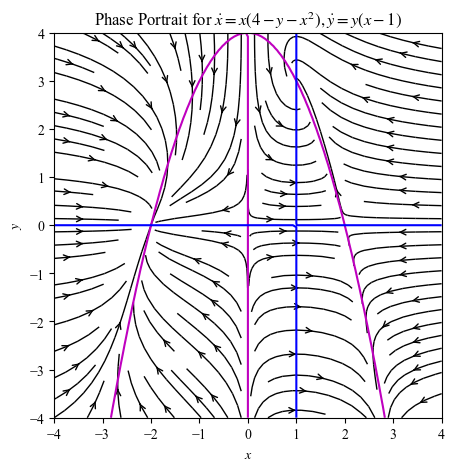

In [43]:
f_x = lambda x,y: x*(4-y-x**2)
f_y = lambda x,y: y*(x-1)
x_ = [-4,4]
y_=[-4,4]

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x}=x(4-y-x^2),\dot{y}=y(x-1)$")
ax = PP_2d(x_[0],x_[1],y_[0],y_[1], f_x, f_y, ax, nx=200, ny=200)
ax = PP_nc(x_[0],x_[1],y_[0],y_[1], f_x, f_y, ax)


#### Part (C)

For the stable spiral $(1,3)$, its basin of attraction is the entire first quadrant of the phase space. This is seen in the phase portrain when all of the trajectories end up at the fixed point if they reside in the first quadrant.
<br>
For the stable node $(-2,0)$, its basin of attraction is the entirity of the second and third quadrant of the phase space. This is seen in the phase portrain when all of the trajectories end up at the fixed point if they reside in the second or third quadrant.

Note: Finished this question in 20 minutes

### Problem 2

#### Part (a)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow x(1-x)-\frac{bx}{(x+a)} = 0 \rightarrow x(1-x-\frac{b}{(x+a)})=0\rightarrow x^*=0$
<br>$1-x-\frac{b}{(x+a)}=0 \rightarrow x=1-\frac{b}{(x+a)} \rightarrow x(x+a)=x+a-b \rightarrow (x^*)^2+(a-1)x^*+(b-a)=0 \rightarrow x^* = \frac{1-a \pm \sqrt{(a-1)^2-4(b-a)}}{2}$
<br><br>
There is always a fixed point at $x^*=0$. If $b>\frac{(a+1)^2}{4}$, then there is only one fixed point; if $b=\frac{(a+1)^2}{4}$, then there is another fixed point at $x^*=\frac{1-a}{2}$. If $b<\frac{(a+1)^2}{4}$, then there are three fixed points in total, with two of them being $x^* = \frac{1-a \pm \sqrt{(a-1)^2-4(b-a)}}{2}$.

$f'(x)=\ddot{x}=1-2x-\frac{ba}{(x+a)^2}$

Classiifying each fixed point:<br>
$x^*=0: f'(0)=1-\frac{a-b}{a^2}$. If $b>a$, then it is a stable node; it is an unstable node otherwise. 
<br>
$x^* = \frac{1-a \pm \sqrt{(a-1)^2-4(b-a)}}{2}:$ If $b>\frac{(a+1)^2}{4}$, then these fixed point don't exist. $ b=\frac{(a+1)^2}{4}$, then $x^*=\frac{1-a}{2}$ and $f'(x^*)=1-(1-a)-\frac{\frac{(a+1)^2a}{4}}{(\frac{1-a}{2}+a)^2}=a-a=0$. In this case, the fixed point is neither stable or unstable. When $b<\frac{(a+1)^2}{4}$, then there is another fixed point and $x^* = \frac{1-a \pm \sqrt{(a-1)^2-4(b-a)}}{2}$. For $x^* = \frac{1-a + \sqrt{(a-1)^2-4(b-a)}}{2}$, $f'(x^*) = a-\sqrt{(a+1)^2-4b}-\frac{ab}{a+1+\sqrt{(a+1)^2-4b}}$ Since $b<\frac{(a+1)^2}{4}$, $f'(x^*)$ is negative for all values of $a$ and $b$. This makes this fixed point stable always. For the other fixed point, $f'(x^*)$ is positive if $b>a$, and positive otherwise. This means that $x^* = \frac{1-a - \sqrt{(a-1)^2-4(b-a)}}{2}$ is stable if $b<a$, unstable otherwise.
<br>
<br>
In summary:
<br>One fixed point: $x^*=0$; stable
<br>Two fixed points: $x^*=0$; stable, $x^*=\frac{1-a}{2}$; neither stable or unstable.
<br>Three fixed points: $x^* = \frac{1-a + \sqrt{(a-1)^2-4(b-a)}}{2}$; stable always, $x^*=0$; stable if $b>a$, unstable otherwise, $x^* = \frac{1-a - \sqrt{(a-1)^2-4(b-a)}}{2}$; stable if $b<a$, unstable otherwise.

#### Part (b)

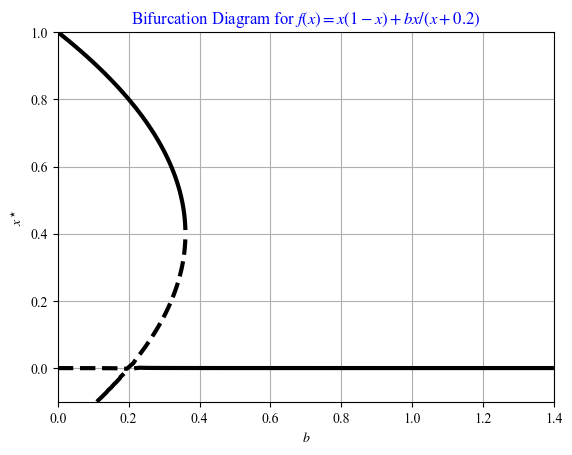

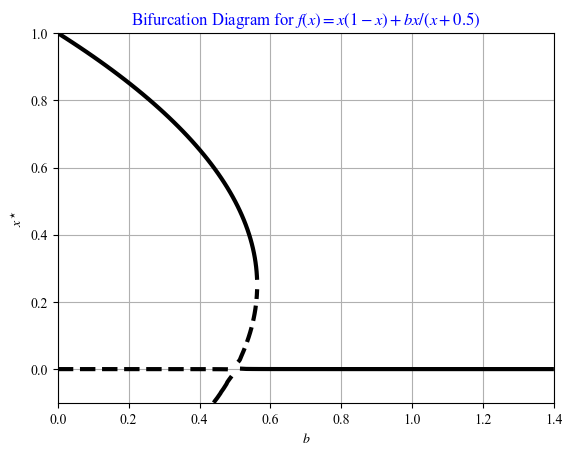

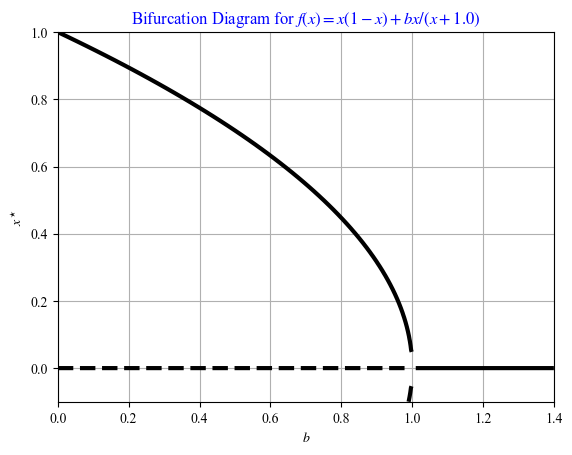

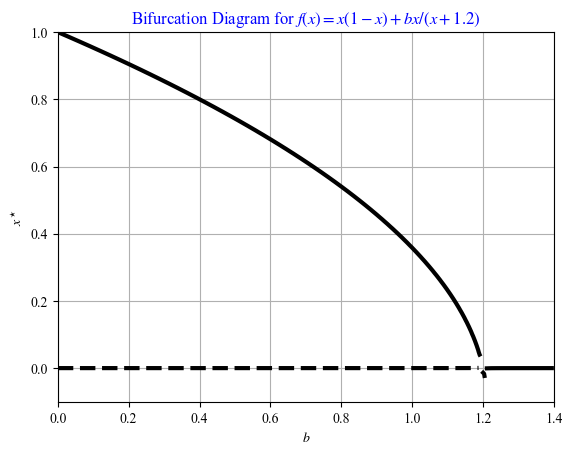

In [44]:
for a in [0.2, 0.5, 1.0, 1.2]:
    f = lambda x,b: x*(1-x)-b*x/(x+a)
    BF_diag(f,-0.1,1.0,0,1.4, title = f"Bifurcation Diagram for $f(x) = x(1-x) + bx/(x+{a})$", x_lab="$b$")

#### Part (c)

When $a=b$, the stability changes of the fixed point $x^*=0$ from unstable to stable. At the same point, the other fixed points converge onto $x=0$ and vanish if $a\geq 1$. This means that there is a supercritical pitchfork bifurcation in this case. If $a<1$, then the stability is exchanged with a fixed point that is going from a negative $x^*$ value to a positive $x^*$ value.  This means that there is a transcritical bifurcation in this case.

#### Part (d)

For $a<1$, when $b=(a+1)^2/4$, the two fixed points $x^* = \frac{1-a \pm \sqrt{(a-1)^2-4(b-a)}}{2}$ collide and become the fixed point $x^* = \frac{1-a}{2}$. Once $b>(a+1)^2/4$, these fixed points cease to exist. This means that there is a saddle-point bifurcation.

#### Part (e)

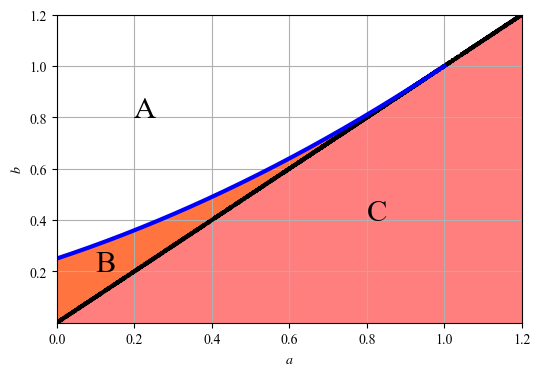

In [45]:
x,a,b = sp.symbols(r'x,a,b')
f1 = lambda x,a,b: x*(1-x)-b*x/(x+a)
FPs = sp.solve(f1(x,a,b),x)
f1 = sp.lambdify([a,b], FPs[1],'numpy')
f2 = sp.lambdify([a,b], FPs[2],'numpy')

# plot the stability diagram (a,b)
n_=2500
a_=np.linspace(0,1.2,n_)
b_=np.linspace(0,1.2,n_)

A,B = np.meshgrid(a_,b_)
zF1= f1(A,B)
zF2 = f2(A,B)

fig, ax=plt.subplots(figsize=(6,4))

# delimit region with tau<0 (>0) = (un)stable FP
ax.contourf(A,B, zF1,levels=[0,100],colors=['gold','g','c','m'],alpha=0.5)
ax.contour(A,B,  zF1,levels=[0],colors=['k','g','c','m'],linewidths=3,alpha=1)
ax.contourf(A,B, zF2,levels=[0,100],colors=['red','g','c','m'],alpha=0.5)
ax.contour(A,B,  zF2,levels=[0],colors=['k','g','c','m'],linewidths=3,alpha=1)

a__ = np.linspace(0,1.0,int(n_/2))
bF = ((a__+1)**2)/4
ax.plot(a__,bF,color="blue",linewidth=3)

ax.grid()

ax.set_yticks(np.arange(0.2,1.4,0.2))

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')

#Annotations
ax.text(0.2,0.8,'A',fontsize=22)
ax.text(0.1,0.2,'B',fontsize=22)
ax.text(0.8,0.4,'C',fontsize=22)

plt.show()

Region A: One stable fixed point at $x=0$
<br>Region B: Three fixed points for $x\in\mathbb{R}_{\geq0}$; two stable (one is at $x=0$), one unstable
<br>Region C: Two fixed points for $x\in\mathbb{R}_{\geq0}$; one unstable (at $x=0$), one stable
<br>Blue line: Transcritical Bifurcation
<br>Black line: Pitchfork Bifurcation if $a>1$, saddle-point bifurcation otherwise

Hysteresis can occur in this system. For example, the system can go from region B to region C and because of the saddle-point bifurcation, the system can go from stability at a high $x$ value to $x=0$.

### Problem 3

#### Part (a)

In [46]:
# define f1, f2 and A
x,y,a,b = sp.symbols(r'x,y,a,b', nonnegative=True)

f1 = lambda x,y,a,b: 1-(b+1)*x+a*(x**2)*y
f2 = lambda x,y,a,b: b*x-a*x**2*y

A = lambda x,y: sp.Matrix([f1(x,y,a,b),f2(x,y,a,b)]).jacobian([x,y]).applyfunc(sp.factor)
display(Latex(r'Jacobian of the Linearized System: ${}$'.format(sp.latex(A(x,y)))))
tau = A(x,y).trace()
delta = A(x,y).det()
display(Latex(r'$\tau={}$'.format(sp.latex(sp.simplify(tau)))))
display(Latex('$\Delta={}$'.format(sp.latex(sp.simplify(delta)))))
display(Latex(r'$\tau^2-4\Delta={}$'.format(
    sp.latex(sp.simplify(sp.Add(sp.Mul(tau,tau), sp.Mul(sp.Integer(-4), delta)))))))

# calculate fixed points (FPs) and their attributes

FPs = sp.solve((f1(x,y,a,b),f2(x,y,a,b)),x,y)

FPs_ = [[FP_i.subs({x:x,y:y}) for FP_i in FP] for FP in FPs]
A_FPs_ = [A(x,y).subs({x:FP[0],y:FP[1]}) for FP in FPs_]
tau_   = [sp.simplify(A_FP.trace()) for A_FP in A_FPs_]
delta_ = [sp.simplify(A_FP.det()) for A_FP in A_FPs_]

print('Fixed Points with Trace, Determinant, and Discriminant Calculations:')
[display(Latex('${}$ -> Trace: ${}$, Determinant: ${}$, Discriminant: ${}$'.
               format(sp.latex(FP),
                      sp.latex(t),
                      sp.latex(d),
                      sp.latex(sp.simplify(sp.Add(sp.Mul(t,t), sp.Mul(sp.Integer(-4), d)))))))
                      for FP,t,d in zip(FPs,tau_,delta_)];

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Fixed Points with Trace, Determinant, and Discriminant Calculations:


<IPython.core.display.Latex object>

The fixed point $(1, b/a)$ is stable when $b-1<a$, unstable when $b>a+1$, and a linear center when $b=a+1$. It is a spiral when $4a>(a-b+1)^2$ and a node otherwise.

#### Part (b)

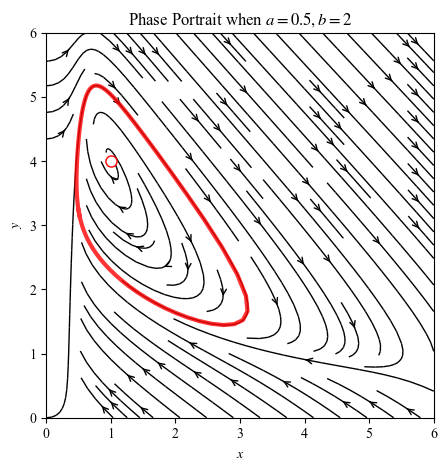

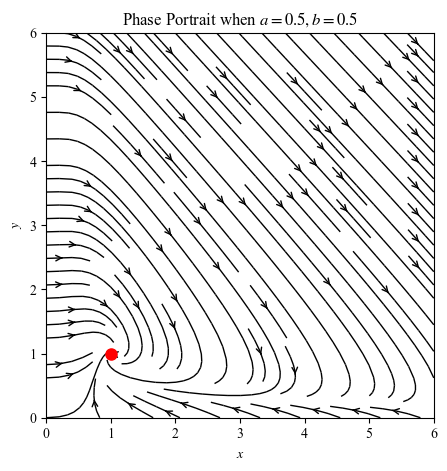

In [47]:
a_ = 0.5
for b_ in [2, 0.5]:
    xfp = 1
    yfp = b_/a_
    _, ax = plt.subplots(figsize=(5,5))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title(f"Phase Portrait when $a={a_}, b={b_}$")

    fx = lambda x,y: 1-(b_+1)*x+a_*(x**2)*y
    fy = lambda x,y: b_*x-a_*x**2*y
    ax = PP_2d(0,6,0,6, fx, fy, ax, nx=1000, ny=1000)
    if b_ == 2:
        T = 100; dt=0.1; xy0=[2,1.5]
        t0= 80; t0_=int(t0/dt)
        t, sol = txy_traj(fx,fy,T,dt,xy0)
        ax.plot(sol[t0_:t0_+100,0],sol[t0_:t0_+100,1],'r-',lw=3,alpha=0.8)
    ax = PP_FPs([(xfp,yfp)], [-a_*xfp*xfp+2*a_*xfp*yfp-b_-1], [a_*xfp*xfp], ax)

The main difference between these two phase portraits is that for $b=2$, there is a stable limit cycle; when $b=0.5$, there is a stable spiral with no limit cycle.

#### Part (c)

Eigenvalues at the fixed point:

In [48]:
x,y,a,b = sp.symbols('x,y,a,b',nonnegative=True)
display(Latex(r'$Eigenvalues:\lambda={}$'.format(
        sp.latex(list(sp.simplify(A(x,y).subs({x:1, y:b/a}).eigenvals()).keys())))))

<IPython.core.display.Latex object>

A Hopf bifurcation will occur when $Re(\lambda)$ goes from negative to positive. When the spiral is formed, the discriminant is negative. This makes $Re(\lambda) = \frac{b-a-1}{2}$.
<br>
$0=\frac{b-a-1}{2}\rightarrow b=a+1$. If this relationship sastifies, then the system is undergoing a Hopf bifurcation at $a_c=a$ and $b_c=a+1$. Since the systems go froms a stable spiral to an unstable spiral with a stable limit cycle, it is a supercritical Hopf bifurcation.

#### Part (d)

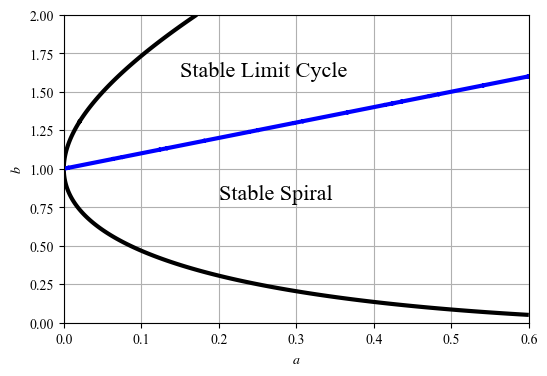

In [49]:
disc = lambda a,b: -4*a+(a-b+1)**2
disc_l = lambda a,b: -4*a+abs((a-b+1))*(a-b+1)
tr = lambda a,b: -a + b - 1

# plot the stability diagram (a,b)
n_=2500
a_=np.linspace(0,0.6,n_)
b_=np.linspace(0,2,n_)

A_,B_ = np.meshgrid(a_,b_)
zF1= disc(A_,B_)
zF2= tr(A_,B_)
zF2H= disc_l(A_,B_)

fig, ax=plt.subplots(figsize=(6,4))

# delimit region with tau<0 (>0) = (un)stable FP
ax.contour(A_,B_,  zF1,levels=[0],colors=['k','g','c','m'],linewidths=3,alpha=1)
ax.contour(A_,B_,  zF2,levels=[0],colors=['b','g','c','m'],linewidths=3,alpha=1)

ax.grid()

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')

#Annotations
ax.text(0.15,1.6,'Stable Limit Cycle',fontsize=16)
ax.text(0.2,0.8,'Stable Spiral',fontsize=16)

plt.show()

#### Part (e)

In [50]:
a_= 0.2
b_= 1.25

a_c = a_
b_c = a_+1

x,y,a,b = sp.symbols('x,y,a,b',nonnegative=True)
display(Latex(r'$Eigenvalues:\lambda={}$'.format(
        sp.latex(list(sp.simplify(A(x,y).subs({x:1, y:b_c/a_c, a: a_c, b: b_c}).eigenvals()).keys())))))

<IPython.core.display.Latex object>

For supercritical Hopf bifurcations, the period of the stable cycle created can be approximated to be $T\approx\frac{2\pi}{|Im(\lambda)|}$ at $(a,b)=(a_c,b_c)$. This means that $T\approx\frac{2\pi}{0.4472}=14.1$.